# Importing libraries and Data preparation

In [0]:
### Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [0]:
cen = pd.read_csv('fulfilment_center_info.csv')
mel = pd.read_csv('meal_info.csv')
main = pd.read_csv('train.csv')

print('Data sets Loaded Successfully.')

Data sets Loaded Successfully.


In [0]:
inner1 =  pd.merge(left=main ,right=cen, left_on='center_id', right_on='center_id')

In [0]:
mark0 = pd.merge(left=inner1 ,right=mel, left_on='meal_id', right_on='meal_id')
mark0.shape

(456548, 15)

In [0]:
sns.set_style('darkgrid')

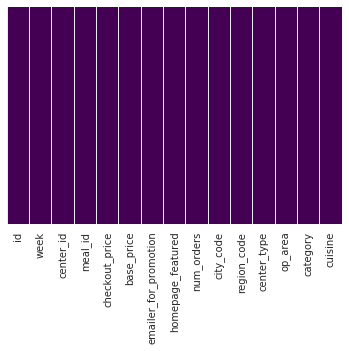

In [0]:
sns.heatmap(mark0.isnull(),yticklabels=False,cbar=False,cmap='viridis')

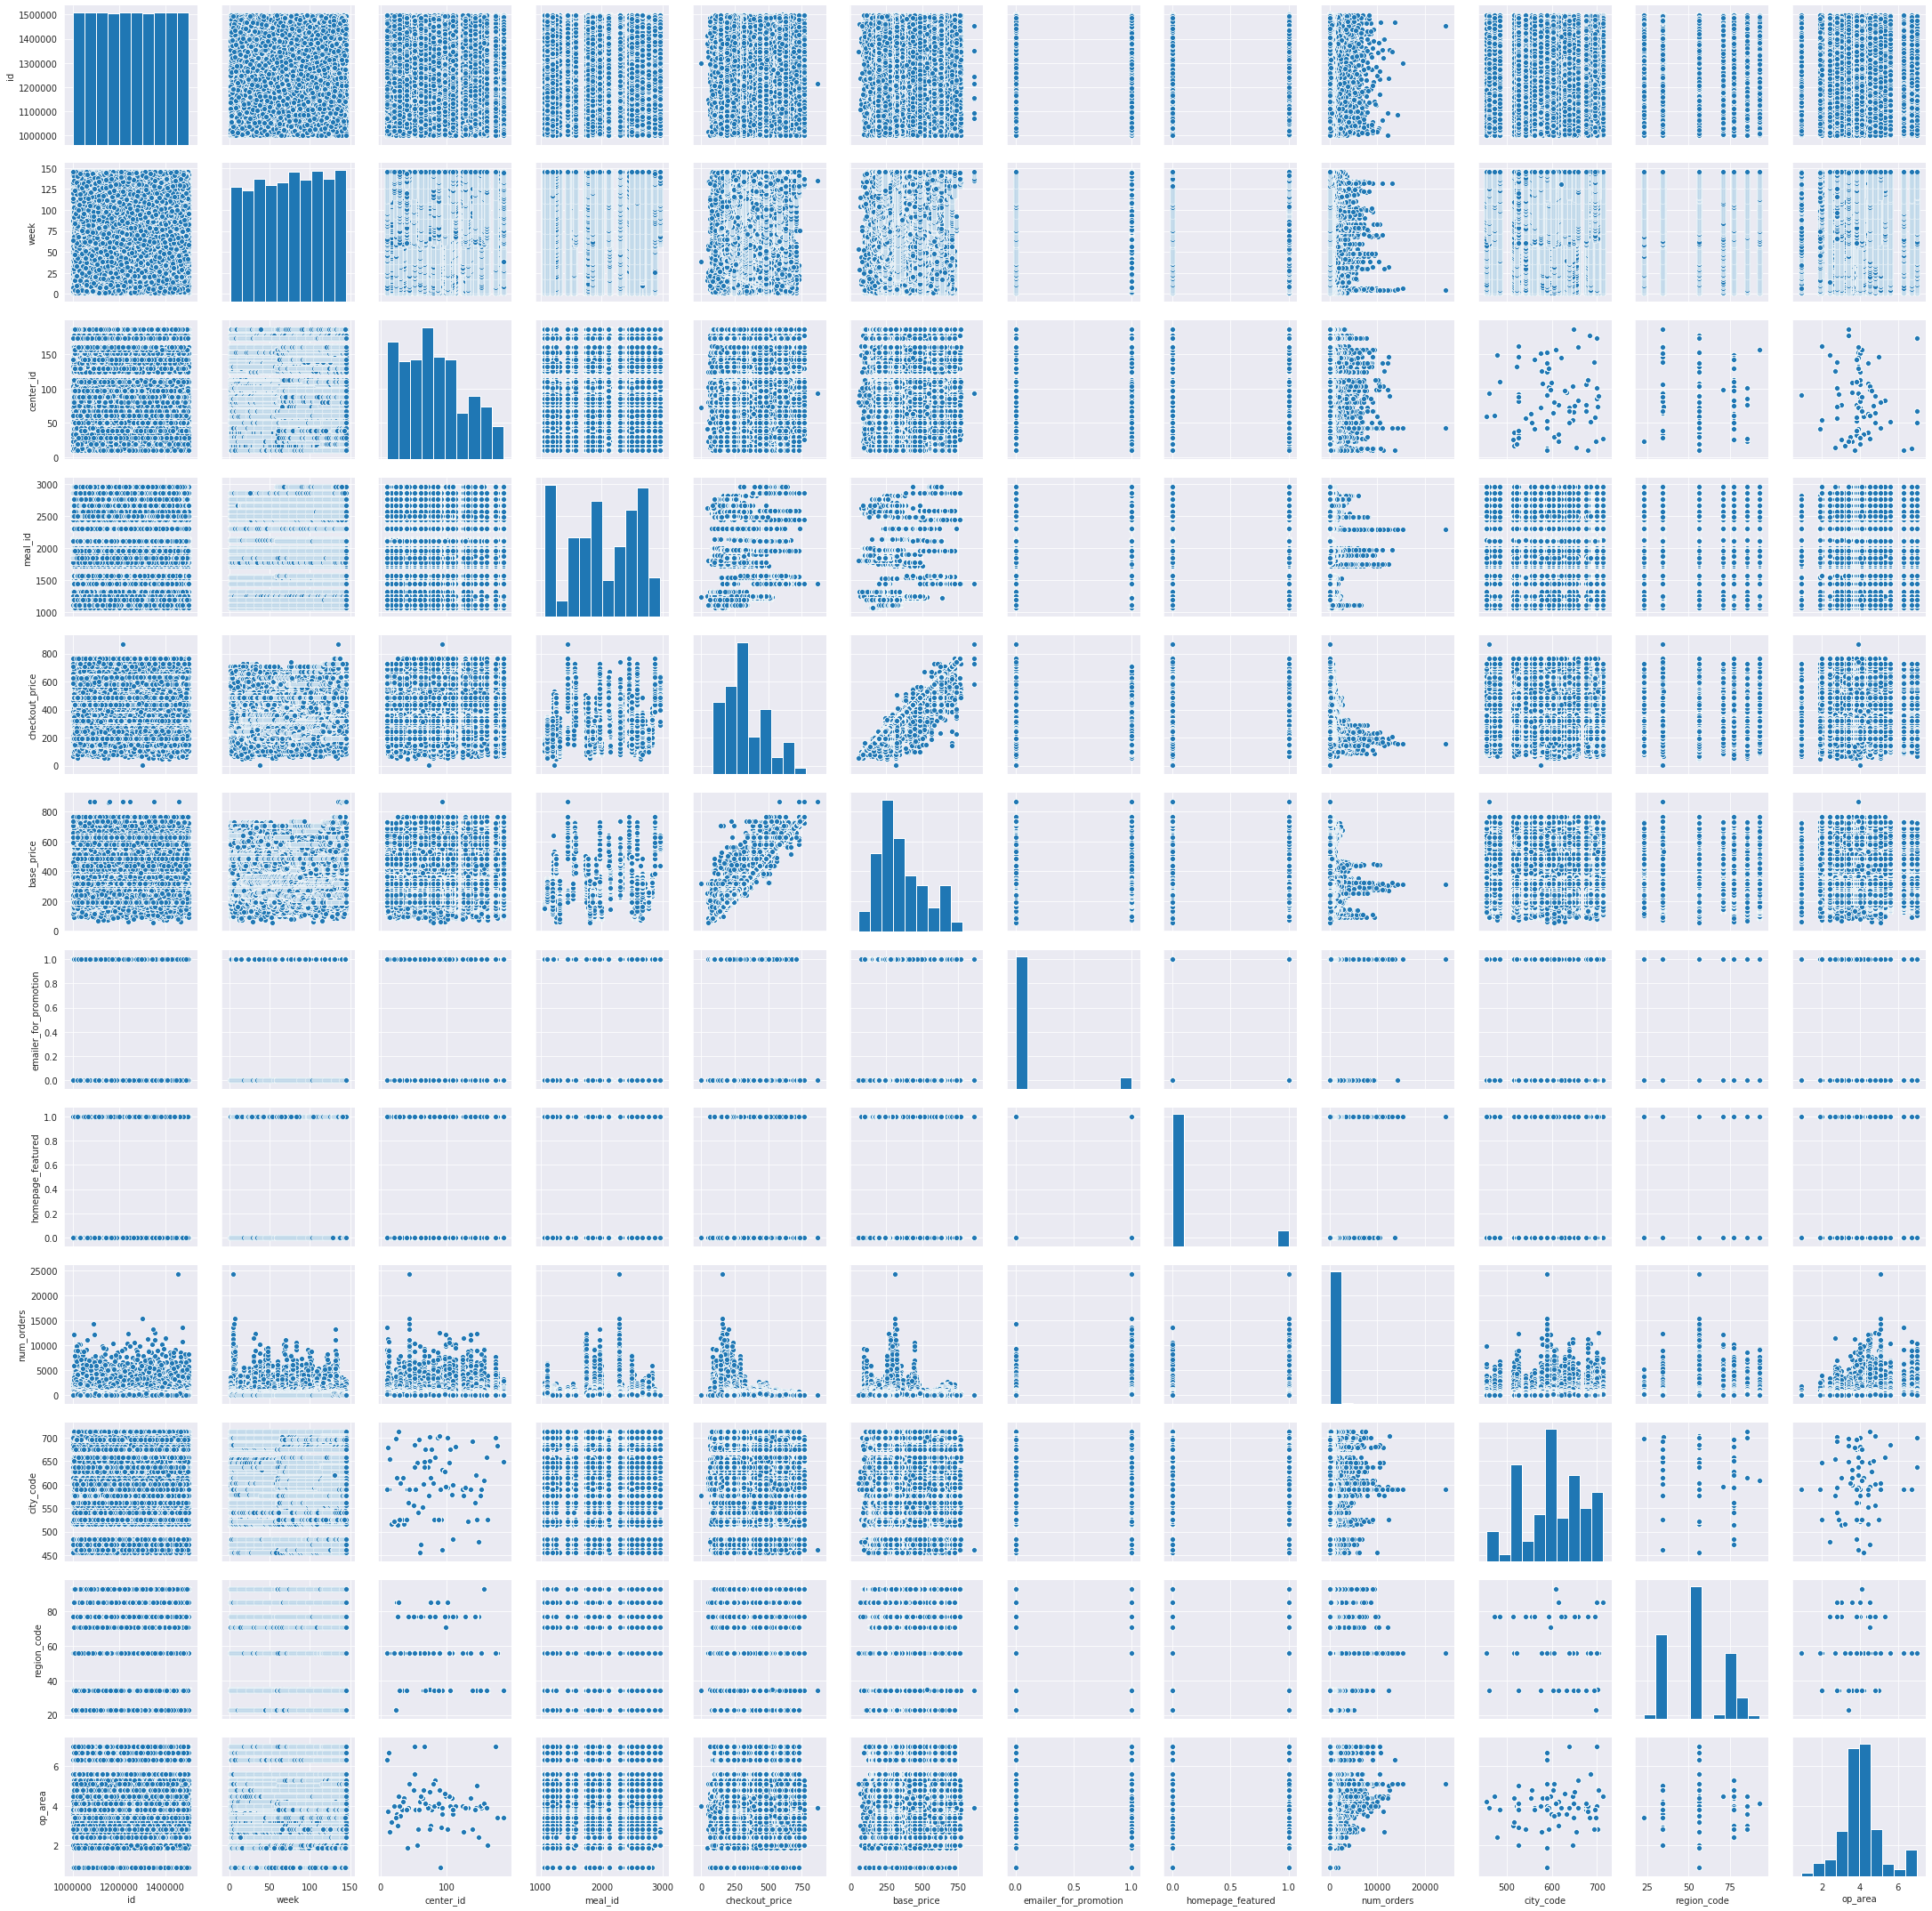

In [0]:
sns.pairplot(mark0, palette='rainbow')

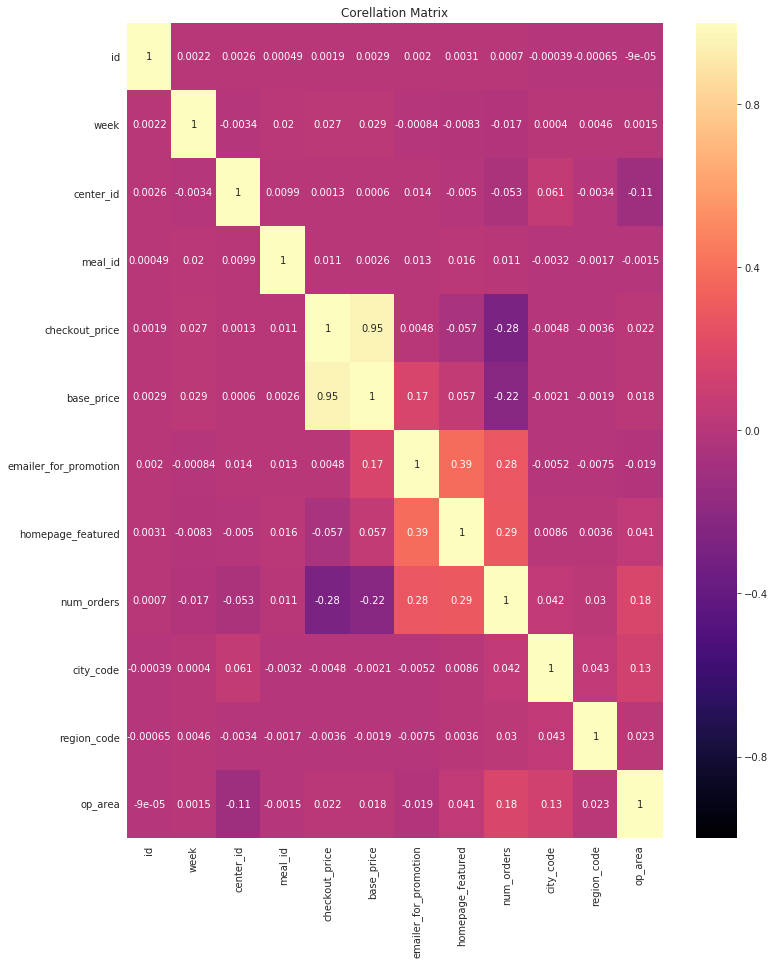

In [0]:
plt.figure(figsize=(12,15))
plt.title('Corellation Matrix')
sns.heatmap(mark0.corr(),vmin=-1,vmax=+1,cmap='magma',annot=True)


<Figure size 864x1080 with 0 Axes>

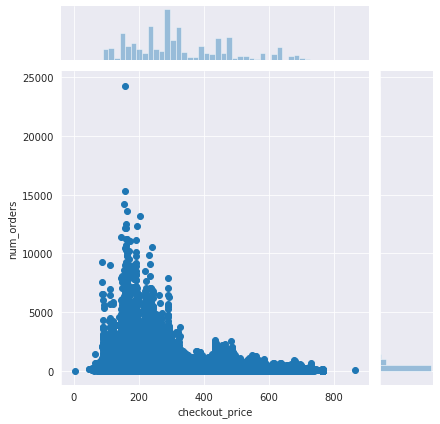

In [0]:
plt.figure(figsize=(12,15))
sns.jointplot(x='checkout_price',y='num_orders',data=mark0)





<Figure size 864x1080 with 0 Axes>

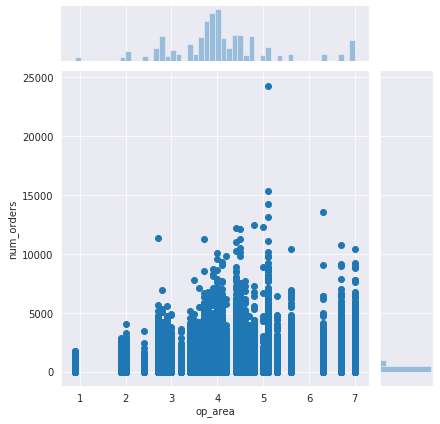

In [0]:
plt.figure(figsize=(12,15))
sns.jointplot(x='op_area',y='num_orders',data=mark0)

In [0]:
mark0.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
257869,1139021,80,61.0,2104.0,583.03,583.03,0.0,0.0,15.0,473,77,TYPE_A,4.5,Fish,Continental
257870,1018798,81,61.0,2104.0,583.03,581.03,0.0,0.0,41.0,473,77,TYPE_A,4.5,Fish,Continental
257871,1063843,82,61.0,2104.0,582.03,583.03,0.0,0.0,40.0,473,77,TYPE_A,4.5,Fish,Continental
257872,1397523,83,61.0,2104.0,583.03,581.03,0.0,0.0,80.0,473,77,TYPE_A,4.5,Fish,Continental
257873,1006160,84,61.0,2104.0,582.03,581.03,0.0,0.0,95.0,473,77,TYPE_A,4.5,Fish,Continental


Text(0.5, 1.0, 'No. of orders at various Center Type')

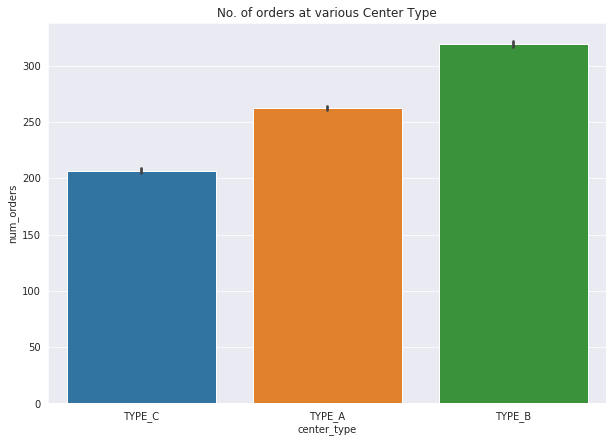

In [0]:
result = mark0.groupby(['center_type'])['num_orders'].aggregate(np.median).reset_index().sort_values('num_orders')
plt.figure(figsize=(10,7))
sns.barplot(x='center_type', y='num_orders', data=mark0, order=result['center_type'])
plt.title('No. of orders at various Center Type')

Text(0.5, 1.0, 'Operational Area of Center vs. No. of Orders')

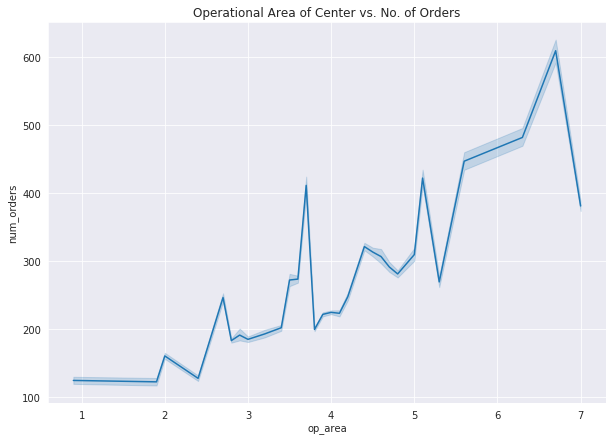

In [0]:
plt.figure(figsize=(10,7))
sns.lineplot(x='op_area', y='num_orders', data=mark0)
plt.xticks(rotation=0)
plt.title('Operational Area of Center vs. No. of Orders')

Text(0.5, 1.0, 'Operational Area for different Center types')

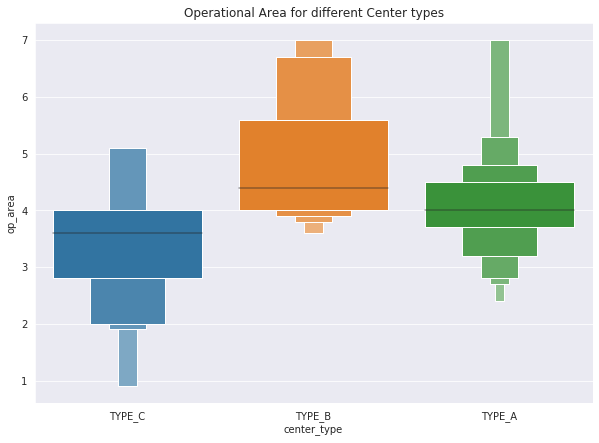

In [0]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='center_type', y='op_area', data=mark0)
plt.title('Operational Area for different Center types')

Text(0.5, 1.0, 'Checkout Price at different Center type')

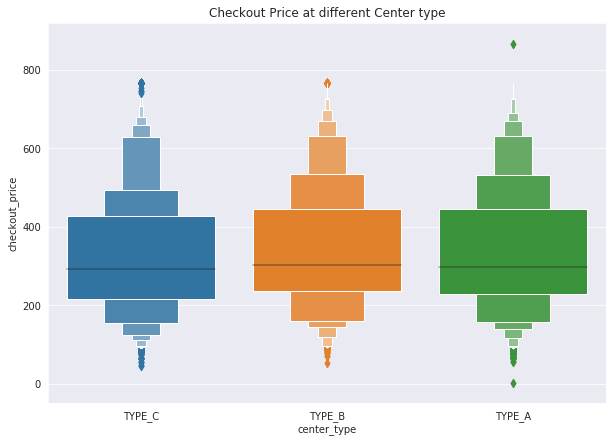

In [0]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='center_type', y='checkout_price', data=mark0)
plt.title('Checkout Price at different Center type')

Text(0.5, 1.0, 'Checkout Price for different Cuisine')

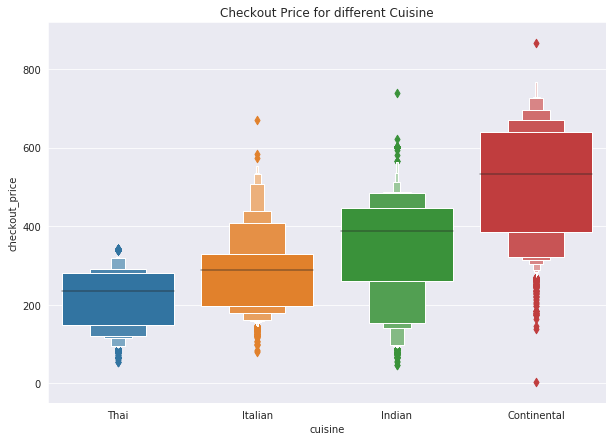

In [0]:
plt.figure(figsize=(10,7))
result = mark0.groupby(['cuisine'])['checkout_price'].aggregate(np.median).reset_index().sort_values('checkout_price')
sns.boxenplot(x='cuisine', y='checkout_price', data=mark0, order=result['cuisine'])
plt.title('Checkout Price for different Cuisine')

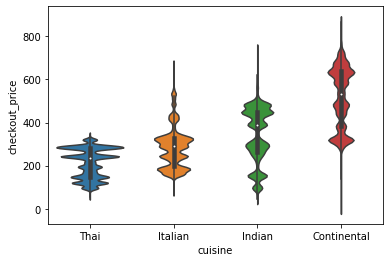

In [0]:
result = mark0.groupby(['cuisine'])['checkout_price'].aggregate(np.median).reset_index().sort_values('checkout_price')
sns.violinplot(x='cuisine', y='checkout_price', data=mark0, order=result['cuisine'])

Text(0.5, 1.0, 'Checkout Price for different Food Categories')

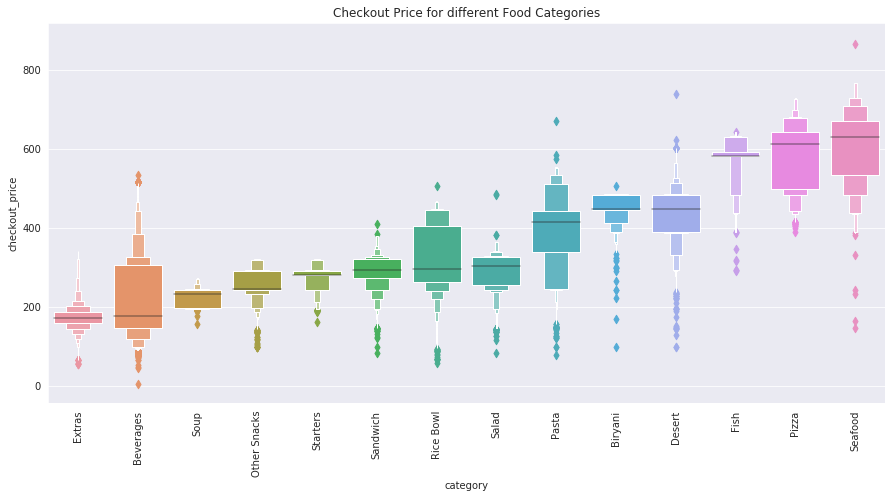

In [0]:
plt.figure(figsize=(15,7))
result = mark0.groupby(['category'])['checkout_price'].aggregate(np.median).reset_index().sort_values('checkout_price')
sns.boxenplot(x='category', y='checkout_price', data=mark0, order=result['category'])
plt.xticks(rotation=90)
plt.title('Checkout Price for different Food Categories')

Text(0.5, 1.0, 'No. of orders for different Food Category')

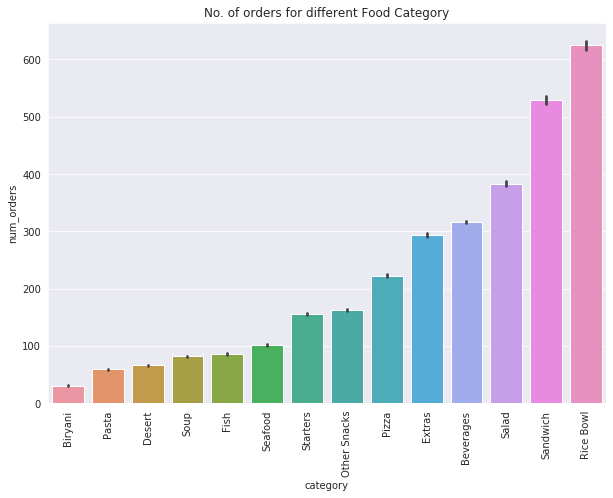

In [0]:
plt.figure(figsize=(10,7))
result = mark0.groupby(['category'])['num_orders'].aggregate(np.mean).reset_index().sort_values('num_orders')
sns.barplot(x='category', y='num_orders', data=mark0, order=result['category'])
plt.xticks(rotation=90)
plt.title('No. of orders for different Food Category')

Text(0.5, 1.0, 'No. of orders for different Category and Center type')

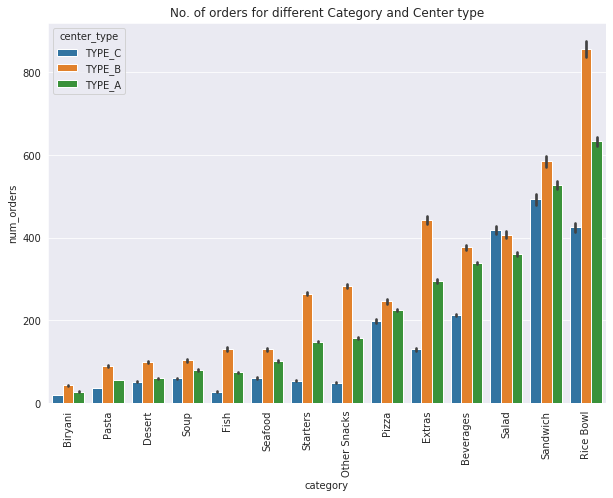

In [0]:
plt.figure(figsize=(10,7))
result = mark0.groupby(['category'])['num_orders'].aggregate(np.mean).reset_index().sort_values('num_orders')
sns.barplot(x='category', y='num_orders', data=mark0, hue='center_type', order=result['category'])
plt.xticks(rotation=90)
plt.title('No. of orders for different Category and Center type')

Text(0.5, 1.0, 'No. of orders for different Cuisine')

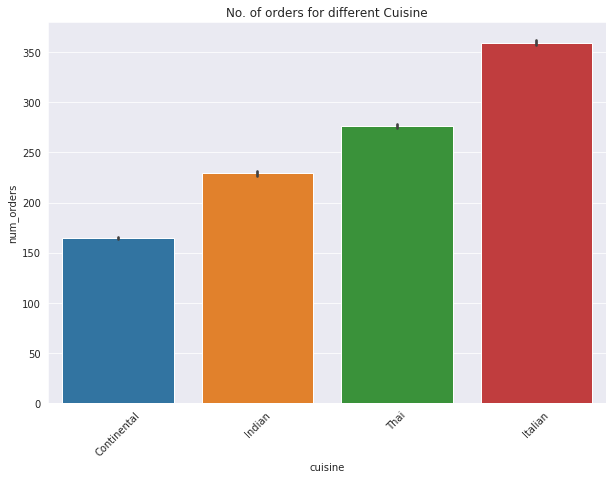

In [0]:
plt.figure(figsize=(10,7))
result = mark0.groupby(['cuisine'])['num_orders'].aggregate(np.mean).reset_index().sort_values('num_orders')
sns.barplot(x='cuisine', y='num_orders', data=mark0, order=result['cuisine'])
plt.xticks(rotation=45)
plt.title('No. of orders for different Cuisine')

Text(0.5, 1.0, 'No. of orders for different Cuisine at each Center type')

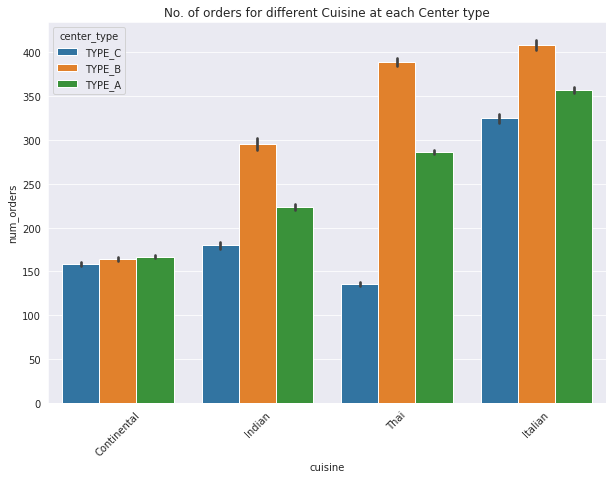

In [0]:
result = mark0.groupby(['cuisine'])['num_orders'].aggregate(np.mean).reset_index().sort_values('num_orders')
plt.figure(figsize=(10,7))
sns.barplot(x='cuisine', y='num_orders', data=mark0, hue='center_type', order=result['cuisine'])
plt.xticks(rotation=45)
plt.title('No. of orders for different Cuisine at each Center type')

Text(0.5, 1.0, 'No. of orders for the period')

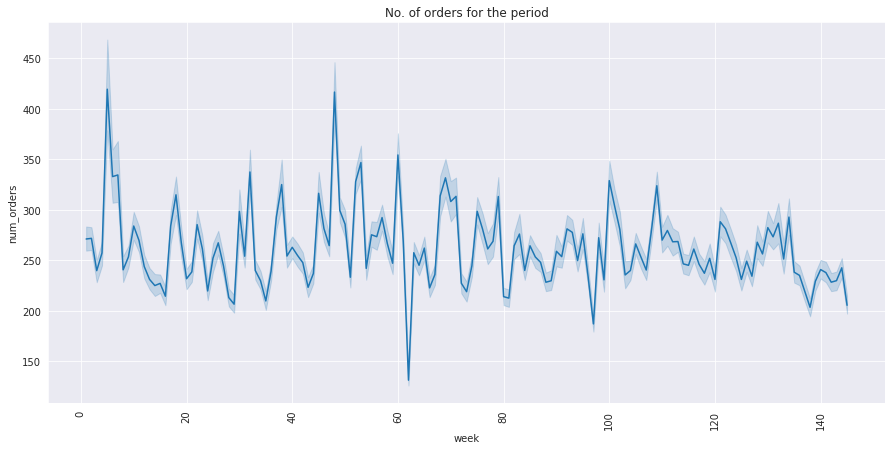

In [0]:
plt.figure(figsize=(15,7))
sns.lineplot(x='week', y='num_orders', data=mark0,palette='o',markers=True,)
plt.xticks(rotation=90)
plt.title('No. of orders for the period')

Text(0.5, 1.0, 'No. of orders for each Cuisine accross the period')

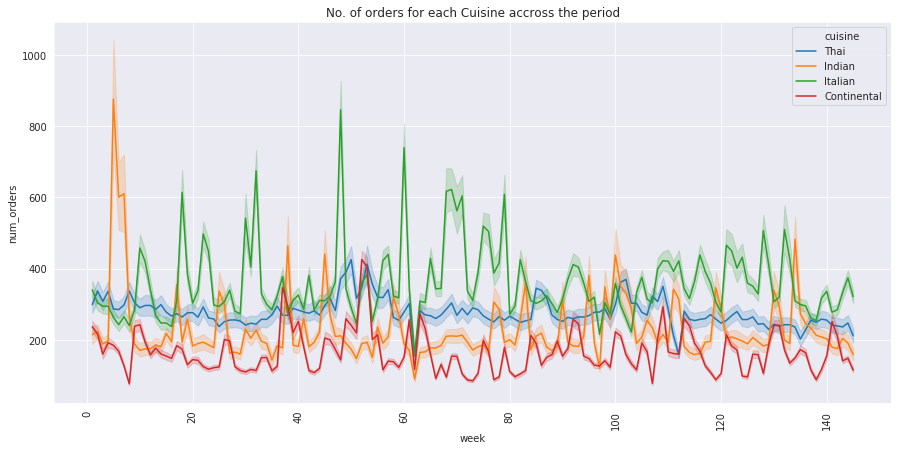

In [0]:
plt.figure(figsize=(15,7))
sns.lineplot(x='week', y='num_orders', data=mark0,hue='cuisine')
plt.xticks(rotation=90)
plt.title('No. of orders for each Cuisine accross the period')

Text(0.5, 1.0, 'No. of orders for each Center Type accross the period')

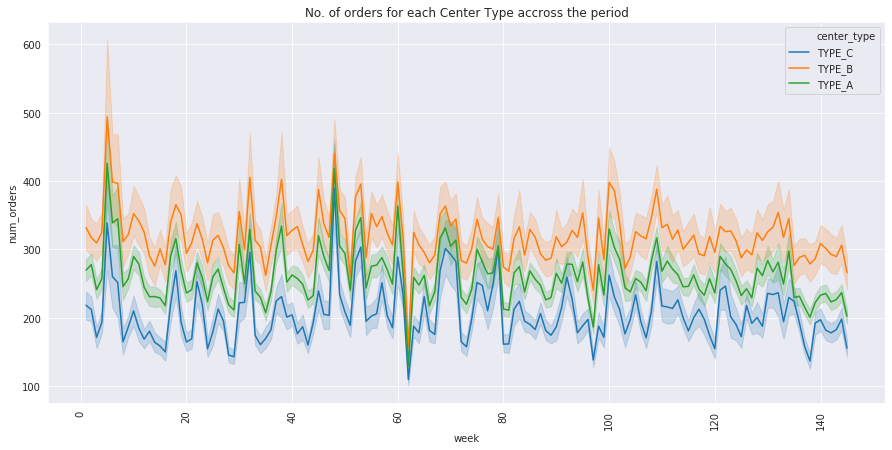

In [0]:
plt.figure(figsize=(15,7))
sns.lineplot(x='week', y='num_orders', data=mark0,hue='center_type')
plt.xticks(rotation=90)
plt.title('No. of orders for each Center Type accross the period')

Text(0.5, 1.0, 'Effect of Email Promotion on Order quantity')

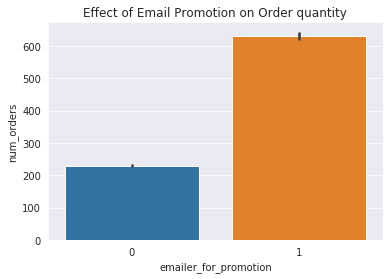

In [0]:
sns.barplot(x='emailer_for_promotion', y='num_orders', data=mark0)
plt.title('Effect of Email Promotion on Order quantity')

Text(0.5, 1.0, 'Effect of Social Media Promotion on Order quantity')

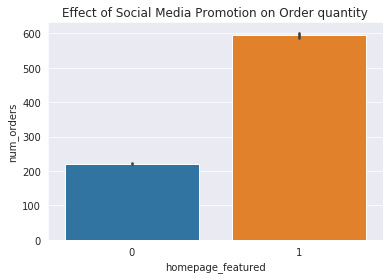

In [0]:
sns.barplot(x='homepage_featured', y='num_orders', data=mark0)
plt.title('Effect of Social Media Promotion on Order quantity')

Text(0.5, 1.0, 'No. of Orders for each City')

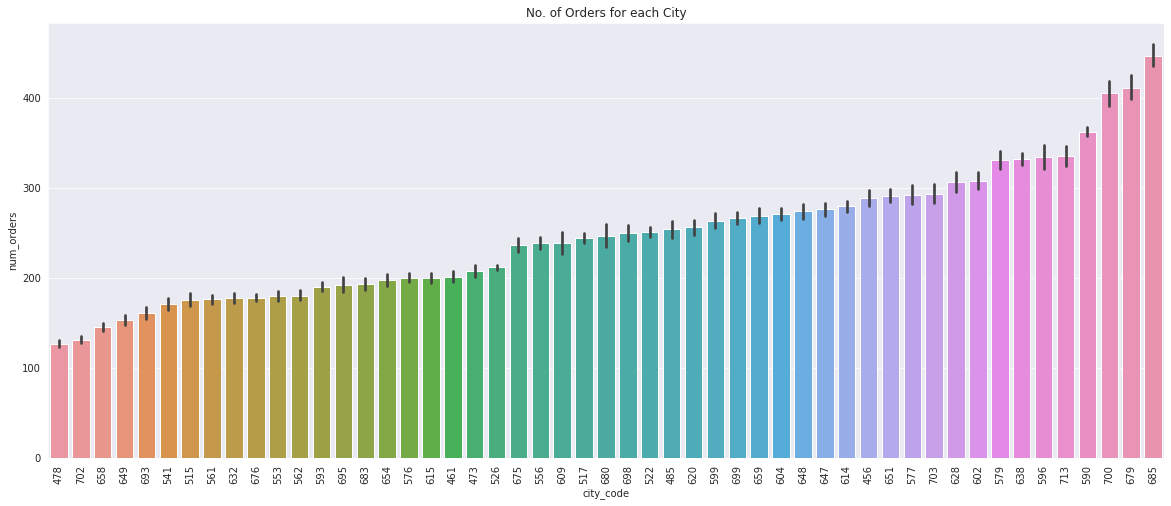

In [0]:
plt.figure(figsize=(20,8))
result = mark0.groupby(['city_code'])['num_orders'].aggregate(np.mean).reset_index().sort_values('num_orders')
sns.barplot(x='city_code', y='num_orders', data=mark0, order=result['city_code'])
plt.xticks(rotation=90)
plt.title('No. of Orders for each City')

Text(0.5, 1.0, 'No. of orders for each Center')

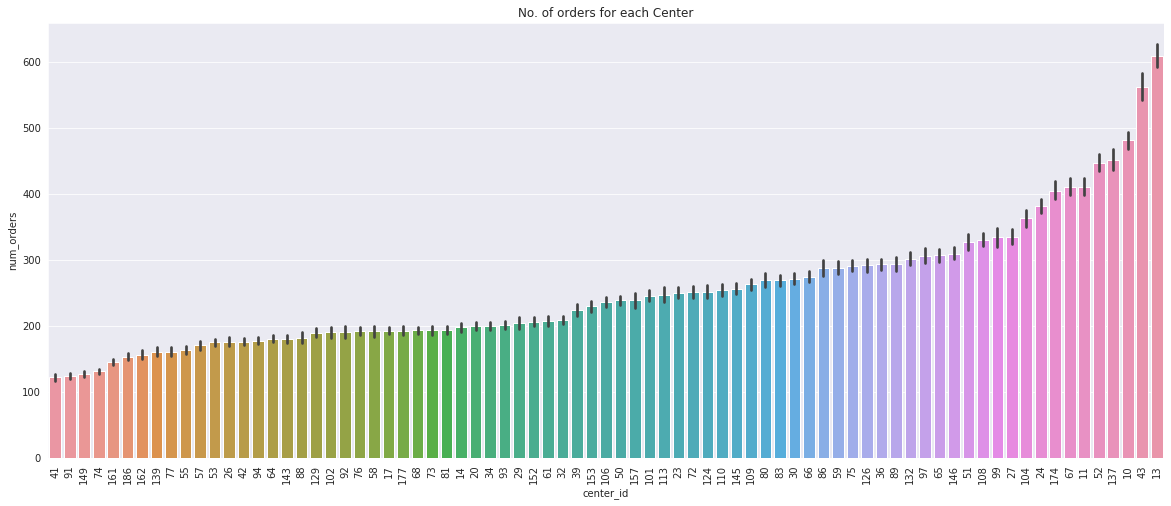

In [0]:

plt.figure(figsize=(20,8))
result = mark0.groupby(['center_id'])['num_orders'].aggregate(np.mean).reset_index().sort_values('num_orders')
sns.barplot(x='center_id', y='num_orders', data=mark0, order=result['center_id'])
plt.xticks(rotation=90)
plt.title('No. of orders for each Center')

Text(0.5, 1.0, 'Operational Area of each Center')

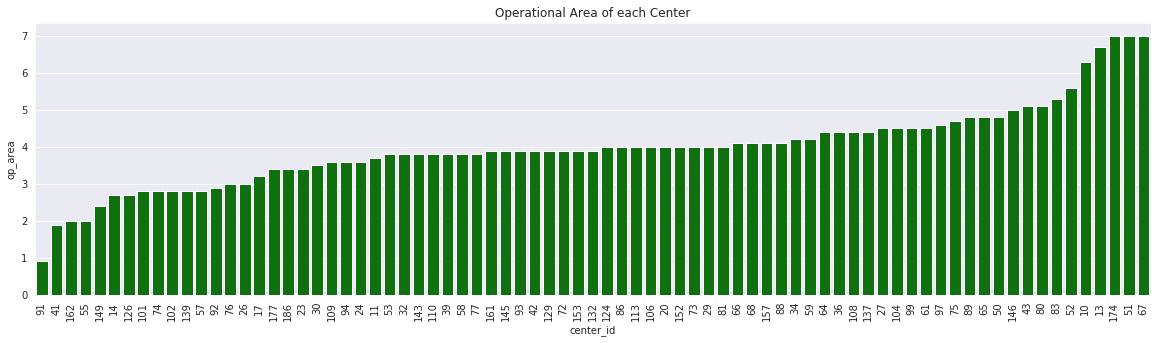

In [0]:
plt.figure(figsize=(20,5))
result = mark0.groupby(['center_id'])['op_area'].aggregate(np.mean).reset_index().sort_values('op_area')
sns.barplot(x='center_id', y='op_area', data=mark0, order=result['center_id'],color='g')
plt.xticks(rotation=90)
plt.title('Operational Area of each Center')

Text(0.5, 1.0, 'No. of Orders in each Region')

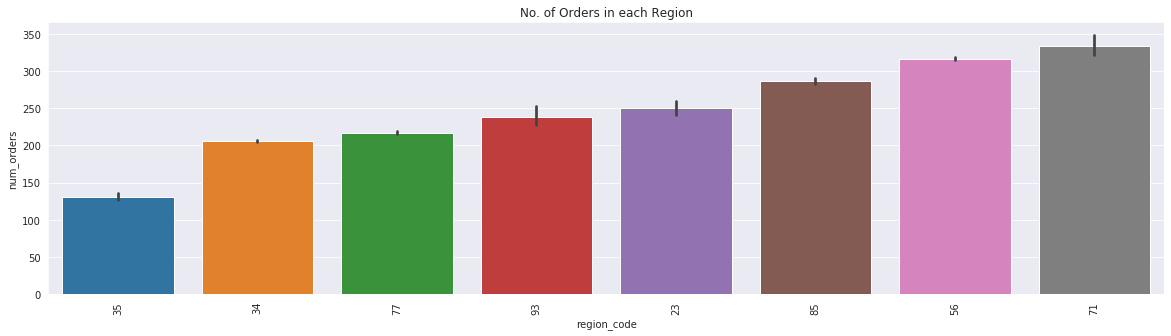

In [0]:
plt.figure(figsize=(20,5))
result = mark0.groupby(['region_code'])['num_orders'].aggregate(np.mean).reset_index().sort_values('num_orders')
sns.barplot(x='region_code', y='num_orders', data=mark0, order=result['region_code'])
plt.xticks(rotation=90)
plt.title('No. of Orders in each Region')

Text(0.5, 1.0, 'Checkout Price for each Region')

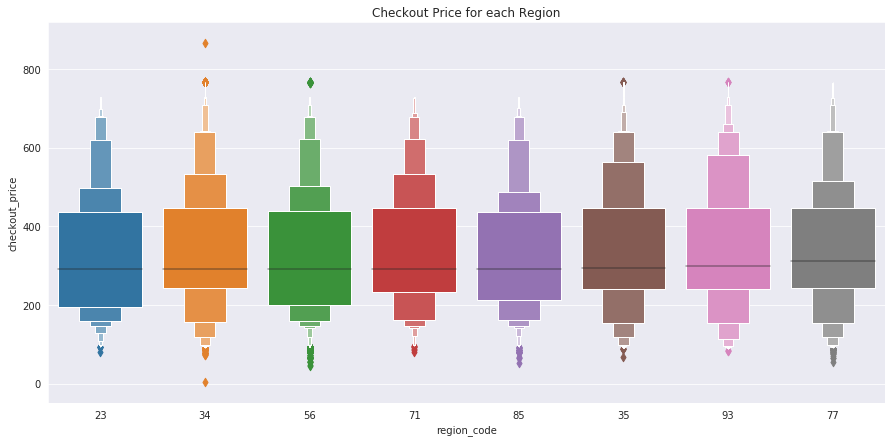

In [0]:
plt.figure(figsize=(15,7))
result = mark0.groupby(['region_code'])['checkout_price'].aggregate(np.median).reset_index().sort_values('checkout_price')
sns.boxenplot(x='region_code', y='checkout_price', data=mark0, order=result['region_code'])
plt.xticks(rotation=0)
plt.title('Checkout Price for each Region')

Text(0.5, 1.0, 'Checkout Price for each Region across different Cuisine')

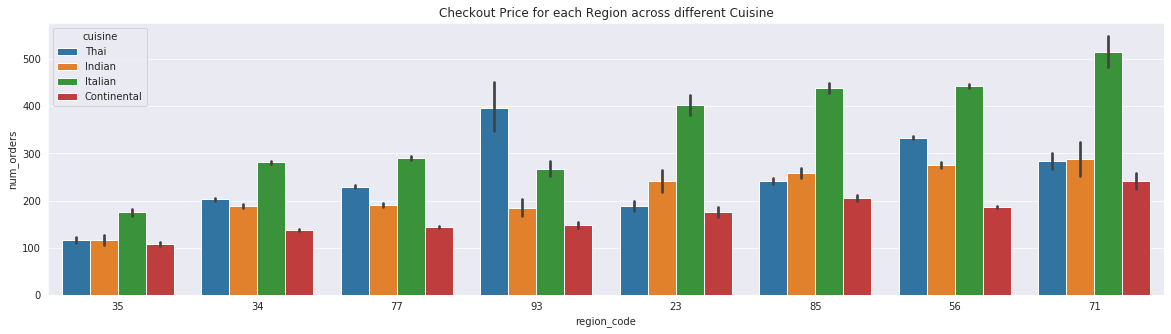

In [0]:
plt.figure(figsize=(20,5))
result = mark0.groupby(['region_code'])['num_orders'].aggregate(np.mean).reset_index().sort_values('num_orders')
sns.barplot(x='region_code', y='num_orders', data=mark0, hue='cuisine', order=result['region_code'])
plt.xticks(rotation=0)
plt.title('Checkout Price for each Region across different Cuisine')

In [0]:
a = mark0.groupby(['cuisine'])['category']
print(a)

Text(0.5, 1.0, 'Effect of Email Promotion on Checkout Price')

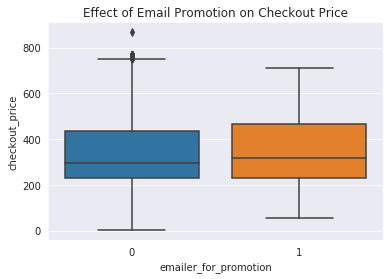

In [0]:
sns.boxplot(x='emailer_for_promotion',y='checkout_price', data=mark0)
plt.title('Effect of Email Promotion on Checkout Price')

Text(0.5, 1.0, 'Effect of Social Media Promotion on Order quantity')

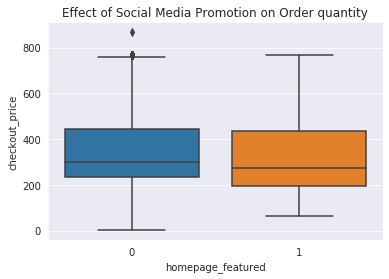

In [0]:
sns.boxplot(x='homepage_featured',y='checkout_price', data=mark0)
plt.title('Effect of Social Media Promotion on Order quantity')

In [0]:
plt.figure(figsize=(15,20))
pivot = pd.pivot_table(mark0,index=["region_code","city_code","center_id"],values=["num_orders"])
pivot

num_orders
region_code city_code center_id            
23          698       23         250.218527
34          461       93         200.965469
            526       29         204.410629
                      32         208.945384
                      39         223.727357
...                                     ...
85          614       76         191.627972
            699       86         287.823658
                      101        245.588302
            713       27         335.283525
93          609       157        238.820136

[77 rows x 1 columns]

<Figure size 1080x1440 with 0 Axes>